In [ ]:
# Import Necessary Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline

In [4]:
#Perform Exploratory Data Analysis in just one line of code
pandas_profiling.ProfileReport(pd.read_csv('Churn.csv'))

# Importing the data

In [5]:
#Import Customer Churn Dataset
churn_dataset = pd.read_csv('Churn.csv')

In [8]:
churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Understanding the data

In [13]:
# Number of Columns and Rows in the Dataset
churn_dataset.shape

(7043, 21)

In [10]:
#Show all of the columns
churn_dataset.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [11]:
churn_dataset.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
churn_dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
#Get customer churn count
churn_dataset['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

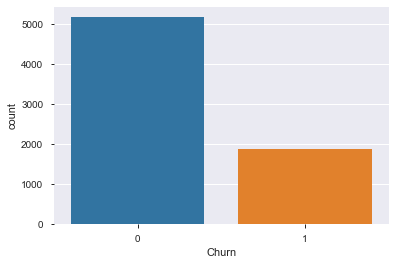

In [15]:
sns.countplot(churn_dataset['Churn'])

In [19]:
# #What is the percentage of customers that are leaving?
# num_retained = churn_dataset[churn_dataset.Churn == 'No'].shape[0]
# num_churned = churn_dataset[churn_dataset.Churn == 'Yes'].shape[0]
# try:
#     #Print the percentage of customers that stayed
#     a=(num_retained / (num_retained + num_churned) * 100 , '% of customers stayed with the company.')
#     print(a)
#     #Print the percentage of customers that left
#     b=(num_churned / (num_retained + num_churned) * 100 , '% of customers left with the company.')
#     print(b)
# except ZeroDivisionError:
#     a=0
#     b=0

### Data Manipulation

In [51]:
# Convert String values (Yes and No) of Churn column to 1 and 0
churn_dataset.loc[churn_dataset.Churn=='No','Churn'] = 0 
churn_dataset.loc[churn_dataset.Churn=='Yes','Churn'] = 1

In [61]:
print(churn_dataset.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [63]:
churn_dataset['Churn']=churn_dataset['Churn'].astype(float)

In [64]:
print(churn_dataset.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object


In [60]:
churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [52]:
# Convert 'No internet service' to 'No' for the below mentioned columns
cols = ['OnlineBackup', 'StreamingMovies','DeviceProtection',
                'TechSupport','OnlineSecurity','StreamingTV']
for i in cols : 
    churn_dataset[i]  = churn_dataset[i].replace({'No internet service' : 'No'})

In [53]:
#Data Manipulation
# Replace all the spaces with null values
churn_dataset['TotalCharges'] = churn_dataset["TotalCharges"].replace(" ",np.nan)

# Drop null values of 'Total Charges' feature
churn_dataset = churn_dataset[churn_dataset["TotalCharges"].notnull()]
churn_dataset = churn_dataset.reset_index()[churn_dataset.columns]

# Convert 'Total Charges' column values to float data type
churn_dataset["TotalCharges"] = churn_dataset["TotalCharges"].astype(float)

In [54]:
churn_dataset['Churn'].value_counts().values

array([5163, 1869], dtype=int64)

### Data Visualization

In [55]:
# Visualize Total Customer Churn
plot_by_churn_labels = churn_dataset["Churn"].value_counts().keys().tolist()
plot_by_churn_values = churn_dataset["Churn"].value_counts().values.tolist()

plot_data= [
    go.Pie(labels = plot_by_churn_labels,
           values = plot_by_churn_values,
           marker = dict(colors =  [ 'Teal' ,'Grey'],
                         line = dict(color = "white",
                                     width =  1.5)),
           rotation = 90,
           hoverinfo = "label+value+text",
           hole = .6)
]
plot_layout = go.Layout(dict(title = "Customer Churn",
                   plot_bgcolor  = "rgb(243,243,243)",
                   paper_bgcolor = "rgb(243,243,243)",))


fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [65]:
# Visualize Churn Rate by Gender
plot_by_gender = churn_dataset.groupby('gender').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_gender['gender'],
        y=plot_by_gender['Churn'],
        width = [0.3, 0.3],
        marker=dict(
        color=['orange', 'green'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn Rate by Gender',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [68]:
# Visualize Churn Rate by Tech Support
plot_by_techsupport = churn_dataset.groupby('TechSupport').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_techsupport['TechSupport'],
        y=plot_by_techsupport['Churn'],
        width = [0.3, 0.3, 0.3],
        marker=dict(
        color=['orange', 'green', 'teal'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn Rate by Tech Support',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [69]:
# Visualize Churn Rate by Internet Services
plot_by_internet_service = churn_dataset.groupby('InternetService').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_internet_service['InternetService'],
        y=plot_by_internet_service['Churn'],
        width = [0.3, 0.3, 0.3],
        marker=dict(
        color=['orange', 'green', 'teal'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn Rate by Internet Service',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [70]:

# Visualize Churn Rate by Payment Method
plot_by_payment = churn_dataset.groupby('PaymentMethod').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_payment['PaymentMethod'],
        y=plot_by_payment['Churn'],
        width = [0.3, 0.3,0.3,0.3],
        marker=dict(
        color=['orange', 'green','teal','magenta'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn Rate by Payment Method',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [71]:
# Visualize Churn Rate by Contract Duration
plot_by_contract = churn_dataset.groupby('Contract').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_contract['Contract'],
        y=plot_by_contract['Churn'],
        width = [0.3, 0.3,0.3],
        marker=dict(
        color=['orange', 'green','teal'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn Rate by Contract Duration',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [72]:
# Visualize Relation between Tenure & Churn rate
plot_by_tenure = churn_dataset.groupby('tenure').Churn.mean().reset_index()
plot_data = [
    go.Scatter(
        x=plot_by_tenure['tenure'],
        y=plot_by_tenure['Churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 5,
            line= dict(width=0.8),
            color= 'green'
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Tenure"},
        title='Relation between Tenure & Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [73]:
#Perform One Hot Encoding using get_dummies method
churn_dataset = pd.get_dummies(churn_dataset, columns = ['Contract','Dependents','DeviceProtection','gender',
                                                        'InternetService','MultipleLines','OnlineBackup',
                                                        'OnlineSecurity','PaperlessBilling','Partner',
                                                        'PaymentMethod','PhoneService','SeniorCitizen',
                                                        'StreamingMovies','StreamingTV','TechSupport'],
                              drop_first=True)

In [74]:
#Perform Feature Scaling and One Hot Encoding
from sklearn.preprocessing import StandardScaler

#Perform Feature Scaling on 'tenure', 'MonthlyCharges', 'TotalCharges' in order to bring them on same scale
standardScaler = StandardScaler()
columns_for_ft_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Apply the feature scaling operation on dataset using fit_transform() method
churn_dataset[columns_for_ft_scaling] = standardScaler.fit_transform(churn_dataset[columns_for_ft_scaling])

In [75]:
# See subset of values
churn_dataset.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_Yes,gender_Male,...,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,0.0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1,5575-GNVDE,0.064303,-0.260878,-0.173740,0.0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
2,3668-QPYBK,-1.239504,-0.363923,-0.959649,1.0,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,0.512486,-0.747850,-0.195248,0.0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,9237-HQITU,-1.239504,0.196178,-0.940457,1.0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [76]:
#Number of columns increased and have suffixes attached, as a result of get_dummies method.
churn_dataset.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_One year', 'Contract_Two year', 'Dependents_Yes',
       'DeviceProtection_Yes', 'gender_Male', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineBackup_Yes', 'OnlineSecurity_Yes',
       'PaperlessBilling_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneService_Yes', 'SeniorCitizen_1', 'StreamingMovies_Yes',
       'StreamingTV_Yes', 'TechSupport_Yes'],
      dtype='object')

In [77]:
#Create Feature variable X and Target variable y
y = churn_dataset['Churn']
X = churn_dataset.drop(['Churn','customerID'], axis = 1)

In [78]:
#Split the data into training set (70%) and test set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 50)

### Implement Machine Learning Models

In [79]:
# Machine Learning classification model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [80]:
#Fit the logistic Regression Model
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
pred = logmodel.predict(X_test)

# Find Accuracy using accuracy_score method
logmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

In [81]:
#Fit the Support Vector Machine Model
svcmodel = SVC(kernel='linear', random_state=50, probability=True)
svcmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
svc_pred = svcmodel.predict(X_test)

# Find Accuracy using accuracy_score method
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)

In [82]:
#Fit the K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 represents Euclidean distance, p=1 represents Manhattan Distance
knnmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
knn_pred = knnmodel.predict(X_test)

# Find Accuracy using accuracy_score method
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)

In [83]:
#Fit the Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 50)
dtmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
dt_pred = dtmodel.predict(X_test)

# Find Accuracy using accuracy_score method
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)

In [84]:
#Fit the Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
rf_pred = rfmodel.predict(X_test)

# Find Accuracy using accuracy_score method
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)

### Model Evaluation

In [85]:
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest'],
    'Score': [logmodel_accuracy, svc_accuracy, knn_accuracy, 
              dt_accuracy, rf_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,81.14,Logistic Regression
1,80.66,Support Vector Machine
2,79.38,Random Forest
3,76.87,K-Nearest Neighbor
4,73.27,Decision Tree


### Final Conclusions

In [86]:
#Generate confusion matrix for logistics regression model as it has maximum Accuracy
from sklearn.metrics import confusion_matrix
conf_mat_logmodel = confusion_matrix(y_test,pred)
conf_mat_logmodel

array([[1396,  165],
       [ 233,  316]], dtype=int64)

In [87]:
# Predict the probability of Churn of each customer
churn_dataset['Probability_of_Churn'] = logmodel.predict_proba(churn_dataset[X_test.columns])[:,1]

In [88]:
# Create a Dataframe showcasing probability of Churn of each customer
churn_dataset[['customerID','Probability_of_Churn']].head()

,customerID,Probability_of_Churn
0,7590-VHVEG,0.649225
1,5575-GNVDE,0.043673
2,3668-QPYBK,0.340977
3,7795-CFOCW,0.026396
4,9237-HQITU,0.694569


In [90]:
churn_dataset.to_excel(r'....\churn_save1.xlsx', columns = ['customerID','Probability_of_Churn'], index = False)